# Factors that affect the Loan Outcome Status
## by Suki Chang

## Investigation Overview

In this investigation, I am interested in exploring the factors that affect the loan outcome. 
The main focus is on loan status, and other features that will affect the outcome of the loan (eg. Prosper Score, monthly income, debt-to-income ratio, loan original amount, employment status and homeownership)

## Dataset Overview

There are 77,557 loan data in the dataset with 12 features (borrower APR, Prosper score, total inquiries, bank card credit, loan status, term and etc). Approximately 36,000 data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loan = pd.read_csv('LoanDataClean.csv')

In [3]:
base_color = sns.color_palette()[0]

### Loan Status
We can see 67.9% of the loan is current loan and around 20,000 loans have been completed. The high risk loan is about 5,000 or 9.3%.

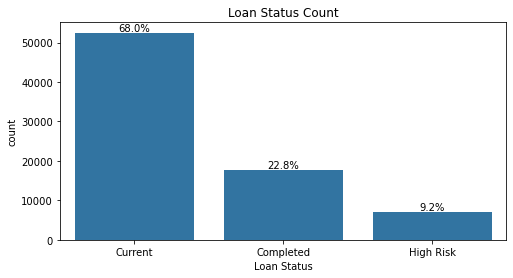

In [4]:
n_listing = loan.shape[0]
listing_counts = loan['LoanStatus'].value_counts()

plt.figure(figsize=[8,4])
sns.countplot(data=loan, x='LoanStatus', color=base_color, order=loan['LoanStatus'].value_counts().index)
plt.xlabel('Loan Status')
plt.title('Loan Status Count')
locs, labels = plt.xticks(rotation=0)

for loc, label in zip(locs, labels): 
    count=listing_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_listing)
    
    plt.text(loc, count+2, pct_string, ha='center', va = 'bottom', color='black');

In [5]:
numeric_vars = ['BorrowerAPR', 'ProsperScore', 'TotalInquiries', 'AvailableBankcardCredit', 'StatedMonthlyIncome',
               'LoanOriginalAmount', 'DebtToIncomeRatio']
categorical_vars = ['LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'Term']

### Heatmap of Correlation Matrix

From heatmap, we observed that:-
- Borrower APR and Prosper score has a negative correlation, which implies the higher the Prosper score, the lower the APR.
- Borrower APR and bankcard credit is negative correlated. This means that the APR will be brought down if the borrower has high available bankcard credit.
- The loan original amount has negative relationship with borrower APR.
- Loan original amount is positively correlated with stated monthly income.

Next, we will continue to explore the relationships we have found with the effect of our main feature of interest: Loan Status. 

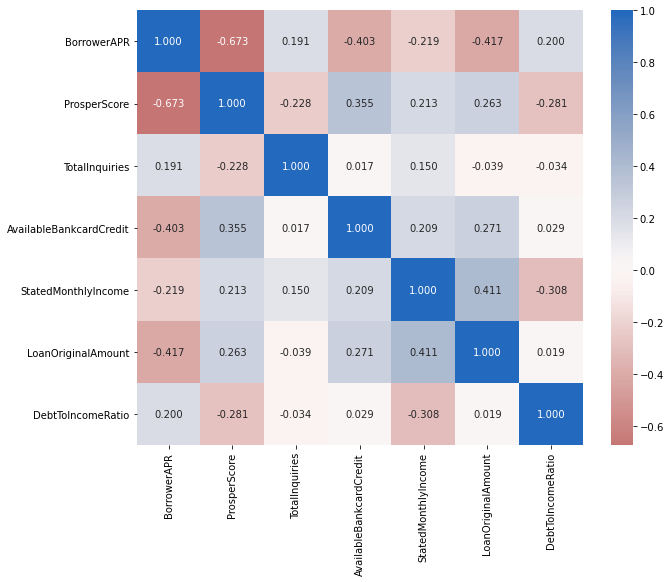

In [6]:
plt.figure(figsize=[10,8])
sns.heatmap(loan[numeric_vars].corr(), annot=True, fmt='.3f', cmap = 'vlag_r', center=0);

## Relationship between Loan Status, Prosper Score and Borrower APR

From the graph below, it is noticed that the Prosper score and borrower APR is negatively correlated. We can see that the Prosper score of the high risk group is between 2-7. The borrower APR of this group is above 0.25%, which is quite high compared to others.

In [7]:
np.random.seed(2018)
sample = np.random.choice(loan.shape[0], 200, replace=False)
loan_subset = loan.iloc[sample]

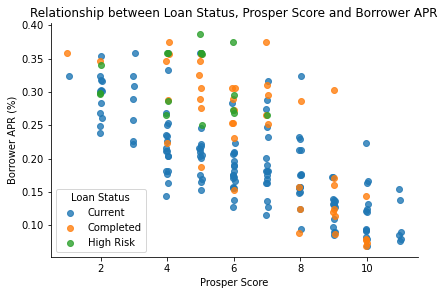

In [8]:
g = sns.FacetGrid(data=loan_subset, hue='LoanStatus', height=4, aspect=1.5)
g.map(sns.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, fit_reg=False)

plt.legend(title='Loan Status')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR (%)')
plt.title('Relationship between Loan Status, Prosper Score and Borrower APR');

## Relationship between Loan Status, Available Bankcard Credit and Borrower APR

The bankcard credit and borrower APR have a negative relationship. We observed that the bankcard credit for the high risk group is generally below $20,000 at APR of 0.25% - 0.4%.

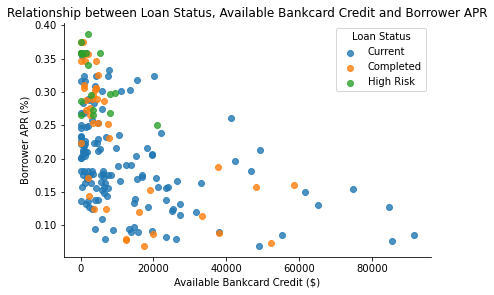

In [9]:
g = sns.FacetGrid(data=loan_subset, hue='LoanStatus', height=4, aspect=1.5)
g.map(sns.regplot, 'AvailableBankcardCredit', 'BorrowerAPR', x_jitter=0.04, fit_reg=False)

plt.legend(title='Loan Status')
plt.xlabel('Available Bankcard Credit ($)')
plt.ylabel('Borrower APR (%)')
plt.title('Relationship between Loan Status, Available Bankcard Credit and Borrower APR');

## Relationship between Loan Status, Loan Original Amount and Borrower APR

The loan original amount and borrower APR is negatively correlated. The loan original amount the high risk group borrow is not more than 15,000 dollar and APR between 0.25% - 0.4%.

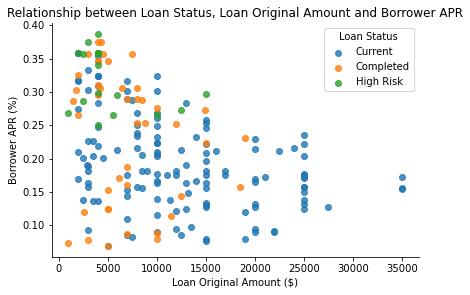

In [10]:
g = sns.FacetGrid(data=loan_subset, hue='LoanStatus', height=4, aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, fit_reg=False)

plt.legend(title='Loan Status')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower APR (%)')
plt.title('Relationship between Loan Status, Loan Original Amount and Borrower APR');

## Relationship between Loan Status, Loan Original Amount and Stated Monthly Income

The loan original amount and stated monthly income have a positive relationship. We observed thathe monthly income of the high risk group generally earns not more than 10,000 dollar and take up loan not more than 15,000 dollar. 

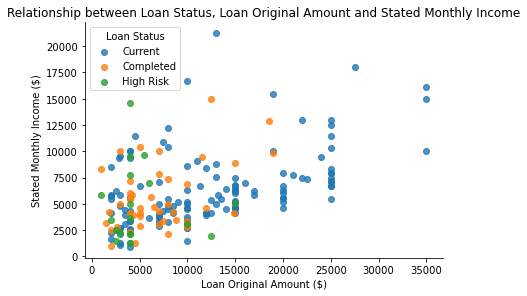

In [11]:
g = sns.FacetGrid(data=loan_subset, hue='LoanStatus', height=4, aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.04, fit_reg=False)

plt.legend(title='Loan Status')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Stated Monthly Income ($)')
plt.title('Relationship between Loan Status, Loan Original Amount and Stated Monthly Income');

In [20]:
!jupyter nbconvert presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook presentation.ipynb to slides
[NbConvertApp] Writing 793889 bytes to presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Suki\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Suki\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Suki\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Suki\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Suki\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\Suki\ana